In [13]:
import pandas as pd
# Читаю одну из 5 книг
book1 = pd.read_csv("datasets/book1.csv")

# принтую часть книги
print(book1.head())

                            Source              Target        Type  weight  \
0                   Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                   Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   

   book  
0     1  
1     1  
2     1  
3     1  
4     1  


In [2]:
# Графы
import networkx as nx
# пустой граф
G_book1 = nx.Graph()

In [3]:
# Итерация по DataFrame книги для добавления ребер
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
# Создание списка узлов для всех книг
books = [G_book1]
book_fnames = ['datasets/book2.csv', 'datasets/book3.csv', 'datasets/book4.csv', 'datasets/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

In [14]:
# Расчет степени центральности книги 1
deg_cen_book1 = nx.degree_centrality(books[0])

# Расчет степени центральности книги 5
deg_cen_book5 = nx.degree_centrality(books[4])

# Сортировка словарей по степени их централизации и сохранение 10 лучших
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]

# Сортировка словарей по степени их централизации и сохранение 10 лучших
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10]

# лучшие в книгах 1 и 5
print(sorted_deg_cen_book1, sorted_deg_cen_book5)

[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)] [('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


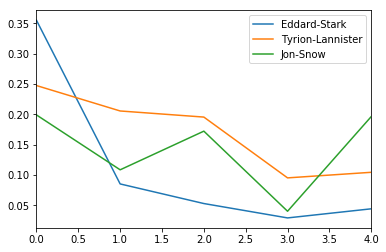

In [15]:
%matplotlib inline

# Создание списка степеней центральности всех книг
evol = [nx.degree_centrality(book) for book in books]
 
# Создание DataFrame из списка степеней централизации во всех книгах
degree_evol_df = pd.DataFrame.from_records(evol)

# Построение степени эволюции центральности Эддарда-Старка, Тириона-Ланнистера и Джона-Сноу
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

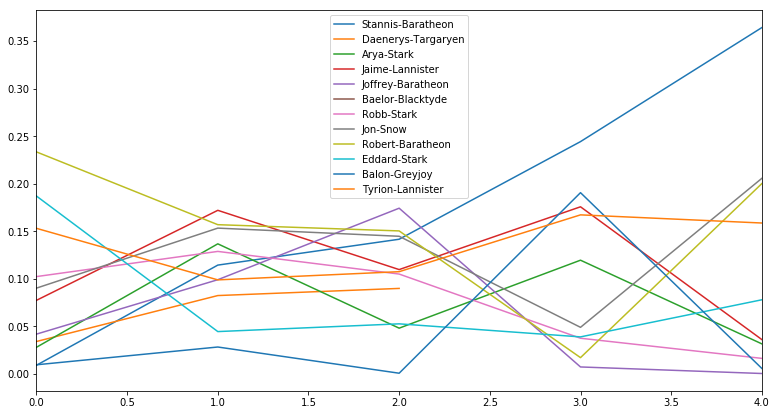

In [20]:
# Создание списка центральности между всеми книгами, как мы делали для центральности степени
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]

betweenness_evol_df = pd.DataFrame(evol)

#Поиск 4 лучших персонажей в каждой книге
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# рисовка
betweenness_evol_df[list_of_char].plot(figsize=(13, 7))

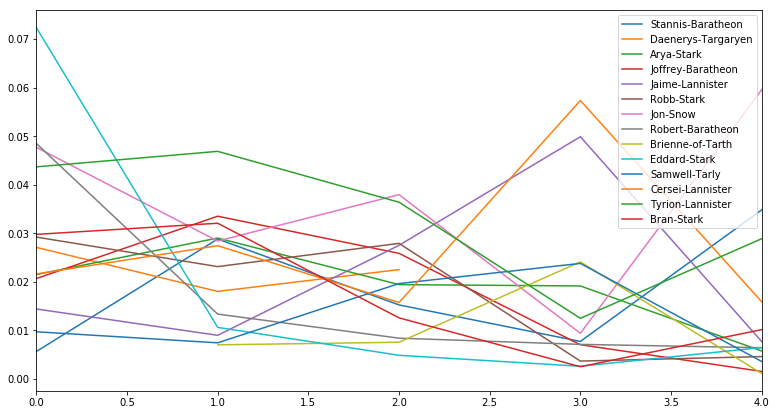

In [9]:
# Создание списка PageRank всех персонажей во всех книгах
evol = [nx.pagerank(book) for book in books]

pagerank_evol_df = pd.DataFrame(evol)

# Поиск 4 лучших персонажей в каждой книге
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# рисую
pagerank_evol_df[list_of_char].plot(figsize=(13, 7))

In [19]:
# Создание списка PageRank, между центральности,
# степени централизации всех персонажей в пятой книге.
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

cor = pd.DataFrame.from_records(measures)

# Корреляция пирсона
cor.T.corr()

,0,1,2
0,1.000000,0.793372,0.971493
1,0.793372,1.000000,0.833816
2,0.971493,0.833816,1.000000


In [17]:
# Нахождение наиболее важного персонажа в пятой книге, 
# согласно степени центральности, между центральностью и страницами.
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

# Распечатка главного персонажа в соответствии с тремя мерами
print(p_rank, b_cent, d_cent)

Jon-Snow Stannis-Baratheon Jon-Snow
